# **Data_602 Final Project**
### By Mubashira Qari

# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

### Describing Dataset

The first dataset is the weekly summary of school learning modalities. It has 923K row and 9 columns.
The second dataset is the US county level covid-19 cases and deaths counts. It has 2249807 rows and 6 columns.
These datasets require detailed data cleaning before performing the data manipulation steps.


### Data Source Link

The datasets are acquired from the following sources,
•	HealthData.gov
•	NYTimes Covid-19 data – GitHub
•	States Names and Abbreviations - GitHub

https://healthdata.gov/National/School-Learning-Modalities/aitj-yx37/data

https://github.com/nytimes/covid-19-data

https://data.world/niccolley/us-zipcode-to-county-state

https://github.com/jasonong/List-of-US-States/blob/master/states.csv



### Justification for Dataset Selection

The reason for choosing these datasets is that I am interested in finding out the impact of covid-19 on the learning modalities for the students. 
My focus will be to investigate the state level trend for the hybrid, remote and in-person learning due to covid for the year 2021 and 2022.



# Data Exploration (EDA)
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



### **Importing Libraries**

#### The first step is to import libraries for data exploration, cleaning and manipulation.

In [140]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')




In [141]:
csv_path = 'https://raw.githubusercontent.com/uzmabb182/Data602_Assignments/main/Final_Project_Data_602/resources/school_learning_modalities.csv'
modality_df = pd.read_csv(csv_path, encoding="utf-8")
modality_df.head(5)

,District NCES ID,District Name,Week,Learning Modality,Operational Schools,Student Count,City,State,ZIP Code
0,100005,Albertville City,10/23/2022 0:00,In Person,6,5824.0,Albertville,AL,35950
1,100006,Marshall County,10/23/2022 0:00,In Person,15,5764.0,Guntersville,AL,35976
2,100007,Hoover City,10/23/2022 0:00,In Person,18,14061.0,Hoover,AL,35243
3,100008,Madison City,10/23/2022 0:00,In Person,11,11695.0,Madison,AL,35758
4,100011,Leeds City,10/23/2022 0:00,In Person,4,2076.0,Leeds,AL,35094


In [142]:
modality_df.loc[modality_df['State'] == 'AK']

,District NCES ID,District Name,Week,Learning Modality,Operational Schools,Student Count,City,State,ZIP Code
94,200001,Lower Kuskokwim School District,10/23/2022 0:00,In Person,29,4245.0,Bethel,AK,99559
95,200003,Lower Yukon School District,10/23/2022 0:00,In Person,11,2027.0,Mountain Village,AK,99632
96,200007,Aleutians East Borough School District,10/23/2022 0:00,In Person,4,234.0,Sand Point,AK,99661
97,200010,Aleutian Region School District,10/23/2022 0:00,In Person,2,29.0,Anchorage,AK,99518
98,200020,Bering Strait School District,10/23/2022 0:00,In Person,15,1900.0,Unalakleet,AK,99684
...,...,...,...,...,...,...,...,...,...
873566,200710,Southwest Region School District,8/1/2021 0:00,In Person,8,636.0,Dillingham,AK,99576
873567,200720,Unalaska City School District,8/1/2021 0:00,In Person,2,412.0,Unalaska,AK,99685
873568,200770,Denali Borough School District,8/1/2021 0:00,In Person,4,993.0,Healy,AK,99743
873569,200775,Yukon Flats School District,8/1/2021 0:00,In Person,6,211.0,Ft. Yukon,AK,99740


In [143]:
csv_path = 'https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv'
states_df = pd.read_csv(csv_path, encoding="utf-8")
states_df.head(5)

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


### **Exploratory Data Analysis (EDA)**

Now previewing the data by calling the dataframe using "info()" function and finding the number of cloumns and rows.

This function provides the total number of rows and columns as well as the datatype of each column. 

Also, we are able to see the count of non-null values, which will help us further investigate the missing, or unexpected values in our dataset.

In [144]:
modality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885591 entries, 0 to 885590
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   District NCES ID     885591 non-null  int64  
 1   District Name        885591 non-null  object 
 2   Week                 885591 non-null  object 
 3   Learning Modality    885591 non-null  object 
 4   Operational Schools  885591 non-null  int64  
 5   Student Count        884691 non-null  float64
 6   City                 885591 non-null  object 
 7   State                885591 non-null  object 
 8   ZIP Code             885591 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


###  The "shape" method provide the row and column count.

In [145]:
modality_df.shape

(885591, 9)

 
### The value_counts() funtion helps in finding the count of values that appear in a column. 

In [146]:
modality_df['Week'].value_counts()

3/13/2022 0:00     14653
4/17/2022 0:00     14649
3/6/2022 0:00      14649
2/27/2022 0:00     14648
3/20/2022 0:00     14648
                   ...  
10/16/2022 0:00    10845
10/23/2022 0:00    10843
8/21/2022 0:00     10599
8/14/2022 0:00     10524
8/7/2022 0:00      10002
Name: Week, Length: 65, dtype: int64

In [147]:
modality_df['Week'].values.tolist()

['10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',
 '10/23/2022 0:00',


### **Data Wrangling**
Create a subset of your original data and perform the following.  

1. Modify multiple column names.

2. Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.

3. Fix missing and invalid values in data.

4. Create new columns based on existing columns or calculations.

5. Drop column(s) from your dataset.

6. Drop a row(s) from your dataset.

7. Sort your data based on multiple variables. 

8. Filter your data based on some condition. 

9. Convert all the string values to upper or lower cases in one column.

10. Check whether numeric values are present in a given column of your dataframe.

11. Group your dataset by one column, and get the mean, min, and max values by group. 
  * Groupby()
  * agg() or .apply()

12. Group your dataset by two columns and then sort the aggregated results within the groups. 

**You are free (and should) to add on to these questions.  Please clearly indicate in your assignment your answers to these questions.**

### 1- Modify multiple column names.

In [148]:
modality_df.columns

Index(['District NCES ID', 'District Name', 'Week', 'Learning Modality',
       'Operational Schools', 'Student Count', 'City', 'State', 'ZIP Code'],
      dtype='object')

In [149]:
modality_df.head()

,District NCES ID,District Name,Week,Learning Modality,Operational Schools,Student Count,City,State,ZIP Code
0,100005,Albertville City,10/23/2022 0:00,In Person,6,5824.0,Albertville,AL,35950
1,100006,Marshall County,10/23/2022 0:00,In Person,15,5764.0,Guntersville,AL,35976
2,100007,Hoover City,10/23/2022 0:00,In Person,18,14061.0,Hoover,AL,35243
3,100008,Madison City,10/23/2022 0:00,In Person,11,11695.0,Madison,AL,35758
4,100011,Leeds City,10/23/2022 0:00,In Person,4,2076.0,Leeds,AL,35094


### Converting date column into Month and Year columns to prepare for machine learning.

In [150]:
modality_df["Week"]= pd.to_datetime(modality_df["Week"])

modality_df['year'] = modality_df['Week'].dt.year


In [151]:
modality_df['month'] = modality_df['Week'].dt.month

In [152]:
modality_df['year'].values.tolist()
modality_df['month'].value_counts()

10    113469
8     106106
9      98004
5      73151
7      73051
1      72985
3      58596
4      58589
2      58569
6      58466
12     57631
11     56974
Name: month, dtype: int64

In [153]:
modality_df

,District NCES ID,District Name,Week,Learning Modality,Operational Schools,Student Count,City,State,ZIP Code,year,month
0,100005,Albertville City,2022-10-23,In Person,6,5824.0,Albertville,AL,35950,2022,10
1,100006,Marshall County,2022-10-23,In Person,15,5764.0,Guntersville,AL,35976,2022,10
2,100007,Hoover City,2022-10-23,In Person,18,14061.0,Hoover,AL,35243,2022,10
3,100008,Madison City,2022-10-23,In Person,11,11695.0,Madison,AL,35758,2022,10
4,100011,Leeds City,2022-10-23,In Person,4,2076.0,Leeds,AL,35094,2022,10
...,...,...,...,...,...,...,...,...,...,...,...
885586,5900187,Hannahville Indian School,2021-08-01,In Person,1,163.0,Wilson,BI,49896,2021,8
885587,5900190,Tiospaye Topa School,2021-08-01,In Person,1,157.0,LaPlant,BI,57652,2021,8
885588,5900193,Seba Dalkai Boarding School,2021-08-01,Hybrid,1,65.0,Winslow,BI,86047,2021,8
885589,5900197,Noli School,2021-08-01,In Person,1,123.0,San Jacinto,BI,92581,2021,8


In [154]:
# modality_df.loc[modality_df['month'] == 12]

### Remove columns not required in the analysis and machine learning model

In [155]:
# Groupby one column and return the mean of only particular column in the group.
modality_df = modality_df.groupby(['Learning Modality', 'year', 'State'], as_index=False).agg(student_count= ('Student Count','mean'))
modality_df

,Learning Modality,year,State,student_count
0,Hybrid,2021,AK,12621.000000
1,Hybrid,2021,AL,8149.978261
2,Hybrid,2021,AR,1343.171429
3,Hybrid,2021,AZ,757.717703
4,Hybrid,2021,BI,382.923077
...,...,...,...,...
275,Remote,2022,SD,2135.000000
276,Remote,2022,TX,17329.250000
277,Remote,2022,UT,637.636364
278,Remote,2022,WA,232.000000


In [156]:
modality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Learning Modality  280 non-null    object 
 1   year               280 non-null    int64  
 2   State              280 non-null    object 
 3   student_count      280 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.9+ KB


### Convert the "Student Count" datatype to Integer and replace NaN values with 0

In [157]:
modality_df['student_count'] = modality_df['student_count'].fillna(0).astype(int)
print(modality_df.dtypes)

Learning Modality    object
year                  int64
State                object
student_count         int64
dtype: object


### Change all column headers to lowercase and removing white spaces

In [158]:
# rename Pandas columns to lower case
modality_df.columns= modality_df.columns.str.strip().str.lower()
modality_df.columns

Index(['learning modality', 'year', 'state', 'student_count'], dtype='object')

### Remove spaces in columns name

In [159]:
modality_df.columns = modality_df.columns.str.replace(' ','_')
   
# After renaming the columns
modality_df.columns


Index(['learning_modality', 'year', 'state', 'student_count'], dtype='object')

### To apply title to the column values

In [160]:
# converting and overwriting values in column
modality_df['learning_modality']= modality_df['learning_modality'].str.upper().str.title()
modality_df.head()

,learning_modality,year,state,student_count
0,Hybrid,2021,AK,12621
1,Hybrid,2021,AL,8149
2,Hybrid,2021,AR,1343
3,Hybrid,2021,AZ,757
4,Hybrid,2021,BI,382


### Creating a function which will remove extra leading
### and trailing whitespace from the data.
### pass dataframe as a parameter here

In [161]:
def whitespace_remover(dataframe):
   
    # iterating over the columns
    for i in dataframe.columns:
         
        # checking datatype of each columns
        if dataframe[i].dtype == 'object':
             
            # applying strip function on column
            dataframe[i] = dataframe[i].map(str.strip)
        else:
             
            # if condn. is False then it will do nothing.
            pass
 
# applying whitespace_remover function on dataframe
whitespace_remover(modality_df)
modality_df.head()

,learning_modality,year,state,student_count
0,Hybrid,2021,AK,12621
1,Hybrid,2021,AL,8149
2,Hybrid,2021,AR,1343
3,Hybrid,2021,AZ,757
4,Hybrid,2021,BI,382


### Resetting the index of the dataframe

In [162]:
# Reseting index
modality_df = modality_df.reset_index(drop=True)
modality_df

,learning_modality,year,state,student_count
0,Hybrid,2021,AK,12621
1,Hybrid,2021,AL,8149
2,Hybrid,2021,AR,1343
3,Hybrid,2021,AZ,757
4,Hybrid,2021,BI,382
...,...,...,...,...
275,Remote,2022,SD,2135
276,Remote,2022,TX,17329
277,Remote,2022,UT,637
278,Remote,2022,WA,232


In [163]:
# modality_df['state'].values.tolist()

In [164]:
modality_df

,learning_modality,year,state,student_count
0,Hybrid,2021,AK,12621
1,Hybrid,2021,AL,8149
2,Hybrid,2021,AR,1343
3,Hybrid,2021,AZ,757
4,Hybrid,2021,BI,382
...,...,...,...,...
275,Remote,2022,SD,2135
276,Remote,2022,TX,17329
277,Remote,2022,UT,637
278,Remote,2022,WA,232


### Removing white spaces from entire dataframe

In [165]:
def whitespace_remover(dataframe):
   
    # iterating over the columns
    for i in dataframe.columns:
         
        # checking datatype of each columns
        if dataframe[i].dtype == 'object':
             
            # applying strip function on column
            dataframe[i] = dataframe[i].map(str.strip)
        else:
             
            # if condn. is False then it will do nothing.
            pass
 
# applying whitespace_remover function on dataframe
whitespace_remover(modality_df)
modality_df.head()

,learning_modality,year,state,student_count
0,Hybrid,2021,AK,12621
1,Hybrid,2021,AL,8149
2,Hybrid,2021,AR,1343
3,Hybrid,2021,AZ,757
4,Hybrid,2021,BI,382


# Preparing for Postgresql import

In [166]:
modality_df.describe()

,year,student_count
count,280.000000,280.000000
mean,2021.496429,13170.996429
std,0.500882,39452.758006
min,2021.000000,125.000000
25%,2021.000000,1651.000000
50%,2021.000000,2990.500000
75%,2022.000000,6437.000000
max,2022.000000,292518.000000


In [167]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
modality_df.to_csv("posgres_modality_df.csv", encoding="utf-8", index=False)

In [168]:
csv_path = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
covid_df = pd.read_csv(csv_path, encoding="utf-8")
covid_df.head(5)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


### **Data Cleaning for Covid_df dataframe**

In [169]:
covid_df = covid_df.drop_duplicates()
covid_df

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
55329,2022-11-25,Virginia,51,2143804,22495
55330,2022-11-25,Washington,53,1854190,14775
55331,2022-11-25,West Virginia,54,613165,7714
55332,2022-11-25,Wisconsin,55,1921427,15651


### Converting into correct date format and then converting date column into Month and Year columns to prepare for machine learning.

In [170]:
covid_df["date"]= pd.to_datetime(covid_df["date"])

covid_df['month'] = covid_df['date'].dt.month

In [171]:
covid_df['year'] = covid_df['date'].dt.year
covid_df.head()

,date,state,fips,cases,deaths,month,year
0,2020-01-21,Washington,53,1,0,1,2020
1,2020-01-22,Washington,53,1,0,1,2020
2,2020-01-23,Washington,53,1,0,1,2020
3,2020-01-24,Illinois,17,1,0,1,2020
4,2020-01-24,Washington,53,1,0,1,2020


### Convert the "Student Count" datatype to Integer and replace NaN values with 0

In [172]:
covid_df['fips'] = covid_df['fips'].fillna(0).astype(int)
covid_df['deaths'] = covid_df['deaths'].fillna(0).astype(int)
print(covid_df.dtypes)

date      datetime64[ns]
state             object
fips               int64
cases              int64
deaths             int64
month              int64
year               int64
dtype: object


In [173]:
covid_df.head()

,date,state,fips,cases,deaths,month,year
0,2020-01-21,Washington,53,1,0,1,2020
1,2020-01-22,Washington,53,1,0,1,2020
2,2020-01-23,Washington,53,1,0,1,2020
3,2020-01-24,Illinois,17,1,0,1,2020
4,2020-01-24,Washington,53,1,0,1,2020


### Dropping the unwanted Columns

In [174]:
covid_df = covid_df.drop(['date', 'month', 'fips'], axis=1)
covid_df.head()

,state,cases,deaths,year
0,Washington,1,0,2020
1,Washington,1,0,2020
2,Washington,1,0,2020
3,Illinois,1,0,2020
4,Washington,1,0,2020


In [175]:
covid_df = covid_df[covid_df['year'] > 2020]
covid_df

,state,cases,deaths,year
16734,Alabama,365747,4872,2021
16735,Alaska,46740,198,2021
16736,Arizona,530267,9015,2021
16737,Arkansas,229442,3711,2021
16738,California,2345811,26236,2021
...,...,...,...,...
55329,Virginia,2143804,22495,2022
55330,Washington,1854190,14775,2022
55331,West Virginia,613165,7714,2022
55332,Wisconsin,1921427,15651,2022


### Resetting the index of the dataframe

In [176]:
# Reseting index
covid_df = covid_df.reset_index(drop=True)
covid_df

,state,cases,deaths,year
0,Alabama,365747,4872,2021
1,Alaska,46740,198,2021
2,Arizona,530267,9015,2021
3,Arkansas,229442,3711,2021
4,California,2345811,26236,2021
...,...,...,...,...
38595,Virginia,2143804,22495,2022
38596,Washington,1854190,14775,2022
38597,West Virginia,613165,7714,2022
38598,Wisconsin,1921427,15651,2022


In [177]:
covid_df.describe()

,cases,deaths,year
count,3.860000e+04,38600.000000,38600.000000
mean,1.072850e+06,14301.964974,2021.477306
std,1.478281e+06,18058.278820,0.499491
min,1.000000e+00,0.000000,2021.000000
25%,2.256040e+05,2434.000000,2021.000000
50%,5.946625e+05,8275.000000,2021.000000
75%,1.347164e+06,18192.000000,2022.000000
max,1.148997e+07,99821.000000,2022.000000


Scatter Plot:  


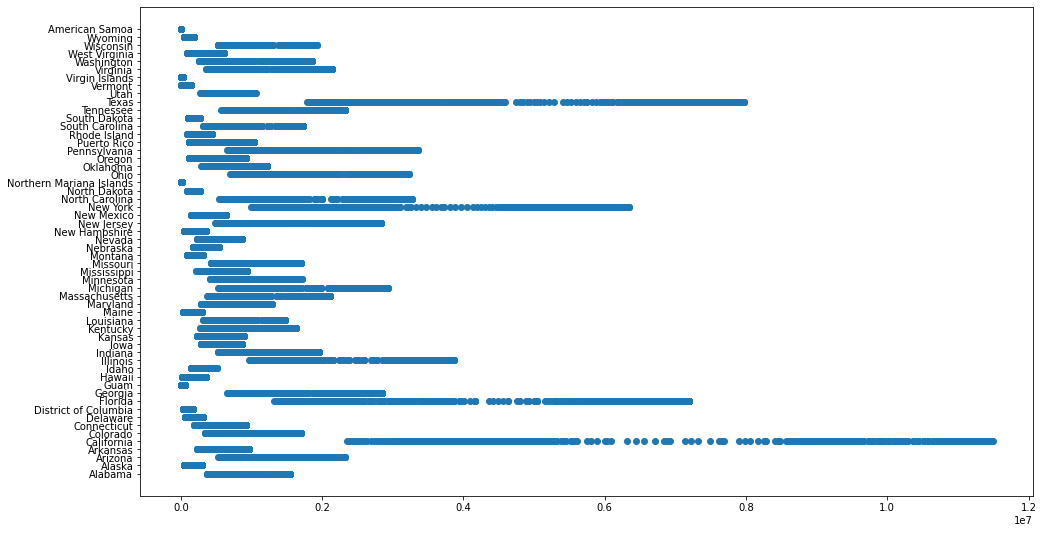

In [178]:
plt.rcParams["figure.figsize"] = [16,9]
# plotting a scatter plot
print("Scatter Plot:  ")
plt.scatter(covid_df["cases"], covid_df["state"])
plt.show()

### Exporting the Covid_df for PostgreSql

In [179]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
covid_df.to_csv("posgres_covid_df.csv", encoding="utf-8", index=False)

In [180]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
#states_df.to_csv("posgres_states_df.csv", encoding="utf-8", index=False)

## **Conclusions**
This file contains three datasets and all require data cleaning steps. I am interested in state level year 2021 and 2022 datasets. And for that reason extract the year from the date column. Now I am excited to analyze them in plotly dash, Tableau and PostgreSQL database.